In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

from itertools import product


In [2]:

def generate_triangle_lattice_Hamiltonian(annihilation_operators, J, J_parallel, U, detunings=None):
    """
    Generate the Hamiltonian for a triangle lattice with nearest neighbor interactions.

    Parameters:
    - annihilation_operators: List of annihilation operators for each qubit.
    - J: Coupling strength(s) between nearest neighbors. Can be a scalar or a list of length num_qubits-1.
    - J_parallel: Coupling strength(s) between parallel qubits. Can be a scalar or a list of length num_qubits-2.
    - U: On-site interaction strength.
    - detunings: Optional list of detuning values for each qubit.

    Returns:
    - Hamiltonian: Qutip Qobj representing the Hamiltonian of the system.
    """
    
    H = 0
    num_qubits = len(annihilation_operators)
    num_couplers = num_qubits - 2


    if isinstance(J, (int, float)):
        J = [J] * (num_qubits - 1)

    if not len(J) == num_qubits - 1:
        raise ValueError(f'Length of J array must be equal to the number of qubits minus 1 ({num_qubits - 1}), given: {len(J)}')

    if isinstance(J_parallel, (int, float)):
        J_parallel = [J_parallel] * (num_qubits - 2)

    if not len(J_parallel) == num_qubits - 2:
        raise ValueError(f'Length of J_parallel must be equal to the number of qubits minus 2 ({num_qubits - 2}), given: {len(J_parallel)}')
    
    # diagonal coupling
    for i in range(num_qubits):
        if i < num_qubits - 1:
            j = i + 1
            H += J[i] * (annihilation_operators[i].dag() * annihilation_operators[j] +
                        annihilation_operators[j].dag() * annihilation_operators[i])
    
    # parallel coupling
    for i in range(num_qubits):
        if i < num_qubits - 2:
            j = i + 2
            H += J_parallel[i] * (annihilation_operators[i].dag() * annihilation_operators[j] +
                                annihilation_operators[j].dag() * annihilation_operators[i])
    
    # On-site interactions
    for i in range(num_qubits):
        H += U * annihilation_operators[i].dag() * annihilation_operators[i] * (annihilation_operators[i].dag() * annihilation_operators[i] - 1)
    
    if detunings is not None:

        if isinstance(detunings, (int, float)):
            detunings = [detunings] * num_qubits

        if len(detunings) != num_qubits:
            raise ValueError("Detuning list must match the number of qubits.")
        for i, detuning in enumerate(detunings):
            H += detuning * annihilation_operators[i].dag() * annihilation_operators[i]
    
    return qt.Qobj(H)


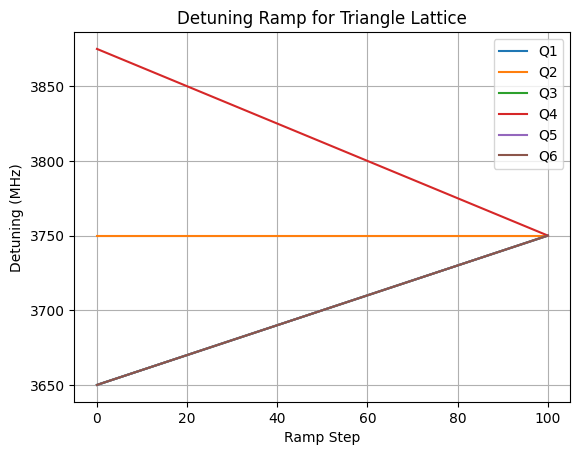

In [ ]:
num_levels = 3
num_qubits = 6

a = qt.destroy(num_levels)
annihilation_operators = [
    qt.tensor([qt.qeye(num_levels)] * i + [a] + [qt.qeye(num_levels)] * (num_qubits - i - 1))
    for i in range(num_qubits)
]

J = -6 * 2 * np.pi
J_parallel = -6 * 2 * np.pi
U = -203 * 2 * np.pi

# set detuning such that Q1 and Q2 are the highest qubits


initial_detunings = [-200, 50, -210, 0, -20, -100, -50, -220]

# Q2: 3750
# Q4: 3825
# everything else: 3650
# 5Q
ramp_frequency = 3750
initial_detunings = [-100, 0, -100, 125, -100]
initial_detunings = [-100, 0, -300, 125, -200]


# 6Q
initial_detunings = [-100, 0, -100, 125, -100, -100]


# Q1, Q3, Q4
# final_detunings = [0, 118.6, 0, 0]


# Q1, Q2, Q4
final_detunings = [0, 0, -440, 0]

# Q2 and Q4
final_detunings = [393, 0, -440, 0]


final_detunings = [0]*num_qubits

detunings_ramp = np.linspace(initial_detunings, final_detunings, 101) 
detunings_ramp += ramp_frequency
detunings_ramp *= 2 * np.pi

for i in range(len(initial_detunings)):
    plt.plot(detunings_ramp[:,i]/2/np.pi, label=f'Q{i+1}')
plt.legend()
plt.xlabel('Ramp Step')
plt.ylabel('Detuning (MHz)')
plt.title('Detuning Ramp for Triangle Lattice')
plt.grid()
plt.show()
    

In [ ]:
energy_levels = []
eigenstates = []
H_list = []


for i in range(detunings_ramp.shape[0]):
    detunings = detunings_ramp[i, :]
    H = generate_triangle_lattice_Hamiltonian(annihilation_operators, J, J_parallel, U, detunings)
    # print(f"Step {i+1}: Detunings = {detunings/2/np.pi} MHz")
   
    H_list.append(H)


    eigenenergies_i, eigenstates_i = H.eigenstates()


    sorted_indices = np.argsort(eigenenergies_i)
    energy_levels.append(eigenenergies_i[sorted_indices])
    eigenstates.append(eigenstates_i[sorted_indices])



H0 = H_list[0]
Hf = H_list[-1]
energy_levels = np.array(energy_levels)

In [131]:
qubit_num_to_interest_states = {}

qubit_num_to_interest_states[4] = [
    (0,0,0,0),
    (0,0,0,1),
    (0,0,1,0),
    (0,1,0,0),
    (1,0,0,0),
    (1,1,0,0),
    (1,0,1,0),
    (1,0,0,1),
    (0,1,1,0),
    (0,1,0,1),
    (0,0,1,1),
    (2,0,0,0),
    (0,2,0,0),
    (0,0,2,0),
    (0,0,0,2),
  
]

qubit_num_to_interest_states[5] = [
    (0,0,0,0,0),
    (0,0,0,1,0),
    (0,0,1,0,0),
    (0,1,0,0,0),
    (1,0,0,0,0),
    (1,1,0,0,0),
    (1,0,1,0,0),
    (1,0,0,1,0),
    (0,1,1,0,0),
    (0,1,0,1,0),
    (0,0,1,1,0),
    (0,0,1,0,1),
    (2,0,0,0,0),
    (0,2,0,0,0),
    (0,0,2,0,0),
    (0,0,0,2,0),
    (0,0,0,0,1),
    (0,0,0,0,2),
]

qubit_num_to_interest_states[6] = [
    (0,0,0,0,0,0),
]


state_energies = []
state_indices = []
index_to_state = {}

interest_states = qubit_num_to_interest_states[num_qubits]
for state in interest_states:
    basis_state = qt.basis([num_levels]*num_qubits, list(state))
    energy = qt.expect(H0, basis_state)

    state_energies.append(energy)
    # Find the closest energy in H0's eigenenergies
    idx = np.argmin(np.abs(energy_levels[0] - energy))
    state_indices.append(idx)

sorted_indices = np.argsort(state_energies)
state_energies = [state_energies[i] for i in sorted_indices]
interest_states = [interest_states[i] for i in sorted_indices]
state_indices = [state_indices[i] for i in sorted_indices]

for i, state in enumerate(interest_states):
    print(f"State {state}: Energy = {state_energies[i]/2/np.pi:.3f} MHz, Closest eigenstate index = {state_indices[i]}")

    index_to_state[state_indices[i]] = interest_states[i]

State (0, 0, 0, 0, 0, 0): Energy = 0.000 MHz, Closest eigenstate index = 0


In [132]:
eigenstate_index = 19
ramp_index = 0

eigenstate = eigenstates[ramp_index][eigenstate_index]

number_operators = [op.dag()*op for op in annihilation_operators]

populations = [qt.expect(op, eigenstate) for op in number_operators]
total_particle_number = sum(populations)

print(f'populations: {populations}')
print(f'total particle number: {total_particle_number}')

# check coupling
eigenstate_index_1 = 19
eigenstate_index_2 = 20


coupling = eigenstates[ramp_index][eigenstate_index_1].dag() * Hf * eigenstates[ramp_index][eigenstate_index_2]
print(f'coupling between state {eigenstate_index_1} and {eigenstate_index_2}: {coupling.real/2/np.pi} MHz')



populations: [0.10315678712802162, 0.9913284335905445, 0.33840580943977405, 0.004162301525619809, 0.39575000481613476, 0.16719666349990614]
total particle number: 2.000000000000001
coupling between state 19 and 20: 0.15277459356730277 MHz


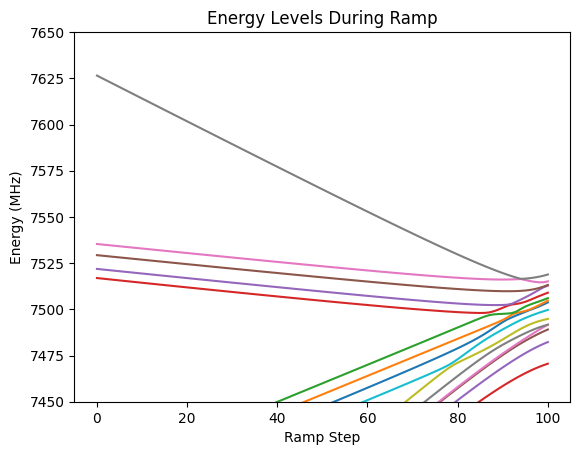

In [133]:



state_index = 19
# plt.axhline(y=energy_levels[0, state_index]/2/np.pi, color='k', linestyle='--', label=f'energy of state index: {state_index}')

plot_initial_energies = False

if plot_initial_energies:
    for i in range(len(interest_states)):
        state = qt.basis([num_levels]*num_qubits, list(interest_states[i]))
        energy = qt.expect(qt.Qobj(H0), state)
        print(f'state: {interest_states[i]}, energy: {energy/2/np.pi} MHz')
        plt.axhline(y=energy/2/np.pi, color='k', linestyle='--', label=f'State {interest_states[i]} Initial')


for i in range(energy_levels.shape[1]):
    plt.plot(np.arange(len(energy_levels)), energy_levels[:, i]/2/np.pi, label=f'Level {i+1}')

plt.xlabel('Ramp Step')
plt.ylabel('Energy (MHz)')
plt.title('Energy Levels During Ramp')
# plt.legend()

# plt.ylim(-100, 200)
# plt.ylim(5000, 7000)
# plt.ylim(5900, 6200)

# two particle band
plt.ylim(6000, 9000)
plt.ylim(7450, 7650)


# single particle band
# plt.ylim(3500, 4800)
# plt.ylim(3900, 4100)



# plt.xlim(15, 40)
# plt.ylim(6004.6, 6004.9)

plt.show()

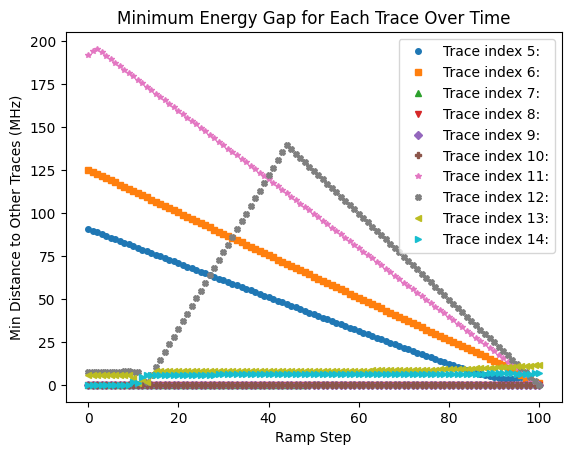

0.06320061002148951


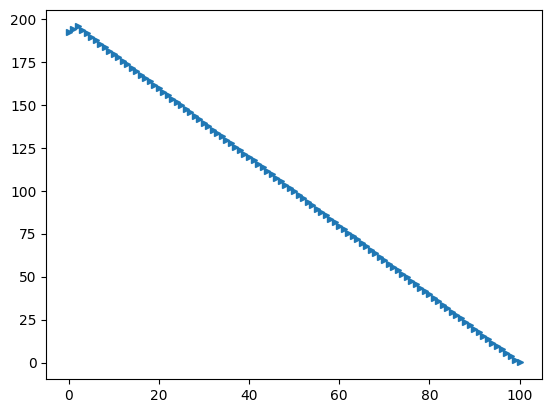

In [134]:
# start_index = 1
# end_index = 5

start_index = 5
end_index = 15

# start_index = 11
# end_index = 12



min_distances = np.zeros_like(energy_levels)

for i in range(energy_levels.shape[1]):
    for t in range(energy_levels.shape[0]):
        # Compute distances to all other traces at this time point
        distances = np.abs(energy_levels[t, i] - np.delete(energy_levels[t, :], i))
        min_distances[t, i] = np.min(distances)


markers = ['o', 's', '^', 'v', 'D', 'P', '*', 'X', '<', '>', 'h', 'H', 'd', 'p', '|', '_']
for i in range(start_index, end_index):
    label = f'Trace index {i}:'
    if i in index_to_state:
        label += f'{index_to_state[i]}'
    plt.plot(np.arange(len(min_distances)), min_distances[:, i]/(2*np.pi), linestyle='', marker=markers[i-start_index], ms=4, label=label)
    # plt.plot(np.arange(len(min_distances)), min_distances[:, i]/(2*np.pi), linestyle='', ms=2, alpha=0.5, label=label, marker=markers[i-start_index])
    # plt.plot(min_distances[:, i]/(2*np.pi), label=label)

    

plt.xlabel('Ramp Step')
plt.ylabel('Min Distance to Other Traces (MHz)')
plt.title('Minimum Energy Gap for Each Trace Over Time')
plt.legend()
plt.show()


plt.plot(np.arange(len(min_distances)), min_distances[:, 11]/(2*np.pi), linestyle='', marker=markers[i-start_index], ms=4, label=label)
print(np.min(min_distances[:, 11]/(2*np.pi)))
plt.show()

In [45]:
def compute_max_adiabatic_violation_subset(H_list, H_i, H_f, T, index_range, target_initial_state_index=None):
    """
    Compute max |<n|dot{H}|m>| / |E_n - E_m|^2 for a restricted set of eigenstates.

    Parameters:
    - H_list: list of Qobj Hamiltonians H(t_i)
    - H_i: Qobj, initial detuning Hamiltonian
    - H_f: Qobj, final detuning Hamiltonian
    - T: total ramp time (same units as energy)
    - index_range: tuple (start_idx, end_idx) of eigenstate indices to consider
    - target_initial_state_index: optional index of the initial state to consider
      (if provided, only this state is considered, relative to all others in range)

    Returns:
    - max_val: the maximum adiabatic violation across all times and relevant state pairs
    """
    max_val = 0.0
    H_diff = H_f - H_i
    N = len(H_list)
    idx_start, idx_end = index_range  # inclusive start, exclusive end

    max_val_time = 0
    max_val_n = 0
    max_val_m = 0
    min_energy_spacing = np.inf

    for idx, H in enumerate(H_list):
        s = idx / (N - 1)
        ds_dt = 1.0 / T
        dH_dt = H_diff * ds_dt

        evals, evecs = H.eigenstates()

        for n in range(idx_start, idx_end):

            # if target_initial_state_index is provided, only consider that state
            if target_initial_state_index is not None and n != target_initial_state_index:
                continue

            for m in range(idx_start, idx_end):
                if m == n:
                    continue

                delta_E = evals[m] - evals[n]
                if np.abs(delta_E) < 1e-9:
                    continue

                matrix_element = (evecs[n].dag() * dH_dt * evecs[m])
                val = np.abs(matrix_element) / (np.abs(delta_E)**2)

                if val > max_val:
                    max_val = val
                    max_val_time = idx
                    max_val_n = n
                    max_val_m = m
                    min_energy_spacing = np.abs(delta_E)

    return max_val, max_val_time, max_val_n, max_val_m, min_energy_spacing


In [47]:
# ramp_time = 0.8 # microseconds
ramp_time = 2 # microseconds

# two particle band
index_range = (5, 15)

# single particle band
# index_range = (1, 5)

target_initial_state_index = index_range[-1] - 1

adiabatice_violation, max_val_time, max_val_n, max_val_m, min_energy_spacing = compute_max_adiabatic_violation_subset(H_list, H0, Hf, ramp_time, index_range, target_initial_state_index)
print(f'adiabatic violation: {adiabatice_violation:.3f}')
print(f'max violation occurs at time index {max_val_time}, between state indices {max_val_n} and {max_val_m}')
print(f'min energy spacing: {min_energy_spacing}, between states {index_to_state[max_val_n]} and {index_to_state[max_val_m]}')

print(f'error estimate: {np.power(adiabatice_violation, 2)}')

adiabatic violation: 0.184
max violation occurs at time index 97, between state indices 14 and 13
min energy spacing: 39.81020187442482, between states (0, 1, 0, 1) and (1, 1, 0, 0)
error estimate: 0.03402178979192261


# 2. M-Particle Subspace

In [3]:
def generate_m_particle_Hamiltonian(num_levels, num_qubits, num_particles, J, J_parallel, U, detuning=None):
        """
        Construct the many-body Hamiltonian for hardcore bosons.
        """

        # print(f'detuning in generate_Hamiltonian: {detuning}')
        single_particle_hamiltonian = generate_triangle_ladder_single_particle_Hamiltonian(num_qubits, J, J_parallel, detuning=detuning)

        # print('single particle Hamiltonian')
        # print(single_particle_hamiltonian)

        if detuning is None:
            detuning = 0

        if isinstance(detuning, (int, float)):
            detuning = np.array([detuning] * num_qubits)


        # Generate basis and mapping to index
        basis = generate_basis(num_qubits, num_particles, num_levels)
        basis_to_index = {state: idx for idx, state in enumerate(basis)}
        dim = len(basis)
        H = np.zeros((dim, dim), dtype=complex)

        # Loop over basis states
        for state in basis:
            # print(f'state: {state}')
            state_idx = basis_to_index[state]
            state_list = list(state)
            
            onsite_energy = 0

            # For each occupied site
            for i in range(num_qubits):

                onsite_energy += U/2*state_list[i]*(state_list[i] - 1)  
            
                if state_list[i] >= 1:
                    # onsite energy
                    onsite_energy += state_list[i]*detuning[i]
                
                    # For each possible hop to an empty site j
                    for j in range(num_qubits):
                        if state_list[j] == 0 and single_particle_hamiltonian[i][j] != 0:
                           # Create new state by moving particle from i to j
                            new_state = state_list.copy()
                            new_state[i] -= 1
                            new_state[j] += 1
                            new_state = tuple(new_state)
                            if new_state in basis_to_index:
                                new_idx = basis_to_index[new_state]
                            
                                # Set matrix element
                                H[state_idx, new_idx] = single_particle_hamiltonian[i][j] * np.sqrt((new_state[i]+1)*new_state[j])
                                # For a Hermitian Hamiltonian, also set the symmetric element
                                H[new_idx, state_idx] = single_particle_hamiltonian[j][i] * np.sqrt((new_state[i]+1)*new_state[j])
        
            # print(f'setting onsite energy to: {onsite_energy/2/np.pi} MHz')
            H[state_idx, state_idx] = onsite_energy

        # Diagonal onsite energies can be added here if needed.
        return qt.Qobj(H)

def generate_triangle_ladder_single_particle_Hamiltonian(num_qubits=None, J_parallel=None, J_perp=None, phase=None, detuning=None, periodic=False):
    """
    Generate the single-particle Hamiltonian for a triangle ladder system.
    """

    if detuning is None:
        detuning = 0

    if phase is None:
        phase = 0

    if isinstance(phase, (int, float)):
        phase = np.array([phase] * (num_qubits - 2))

    if isinstance(detuning, (int, float)):
        detuning = np.array([detuning] * num_qubits)

    # detuning -= np.min(detuning)  # shift detuning to have minimum at 0

    H = np.zeros((num_qubits, num_qubits), dtype='complex')

    for i in range(num_qubits):
        # qubit i is coupled to qubit i + 1 and qubit i + 2
        H[i, i] = detuning[i]

        if i < num_qubits - 1:
            H[i, i + 1] = J_perp
            H[i + 1, i] = np.conjugate(J_perp)

        if i < num_qubits - 2:
            multiplier = -1
            if i % 2 == 1:
                multiplier = 1
            H[i, i + 2] = J_parallel * np.exp(-1j * multiplier * phase[i])
            H[i + 2, i] = np.conjugate(J_parallel * np.exp(-1j * multiplier * phase[i]))

    if periodic:
        if num_qubits >= 4 and num_qubits % 2 == 0:
            # qubit 0 is coupled to qubit num_qubits - 1 and qubit num_qubits - 2
            H[0, num_qubits - 1] = J_perp
            H[num_qubits - 1, 0] = np.conjugate(J_perp)
            
            H[0, num_qubits - 2] = J_parallel * np.exp(1j * phase[0])
            H[num_qubits - 2, 0] = np.conjugate(J_parallel * np.exp(1j * phase[0]))

            H[1, num_qubits - 1] = J_parallel * np.exp(1j * phase[1])
            H[num_qubits - 1, 1] = np.conjugate(J_parallel * np.exp(1j * phase[1]))
        else:
            raise ValueError("Periodic boundary conditions only work for even number of qubits >= 4.")

    # print('Hamiltonian:')
    # print(qt.Qobj(H))

    return qt.Qobj(H)

def generate_basis(N, M, num_levels):
    """
    Generate all bitstrings of length N with M ones.
    """
    basis = [state for state in product(range(num_levels), repeat=N) if sum(state) == M]
    return basis


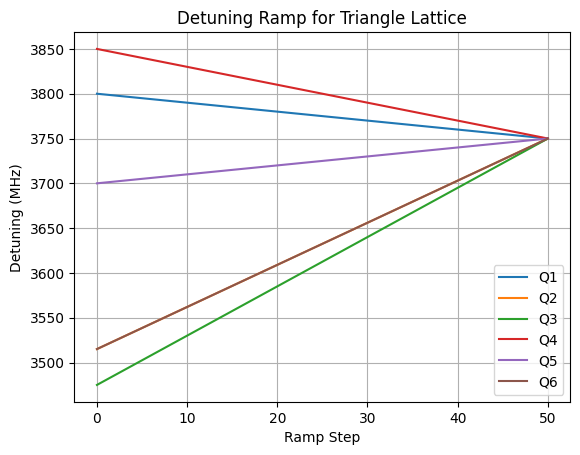

In [11]:
num_levels = 5
num_qubits = 6
num_particles = 1

J = -6 * 2 * np.pi
J_parallel = -6 * 2 * np.pi
U = -203 * 2 * np.pi

# set detuning such that Q1 and Q2 are the highest qubits


initial_detunings = [-200, 50, -210, 0, -20, -100, -50, -220]

# Q2: 3750
# Q4: 3825
# everything else: 3650
# 5Q
ramp_frequency = 3750
initial_detunings = [-100, 0, -100, 125, -100]
initial_detunings = [-100, 0, -300, 125, -200]


# 6Q
initial_detunings = [-100, 0, -100, 125, -100, -100]
initial_detunings = [50, -125, -125, 125, -50, -125]
initial_detunings = [50, -235, -275, 100, -50, -235]

# initial_detunings = [0, -300, -300, 0, 0, -300]


# 8Q
# initial_detunings = [-100, 0, -300, 125, -200, -200, -200, -200]

# initial_detunings = [0, -500, -500, 125, -125, -500, -500, -250]

# initial_detunings = [0, -500, -500, 50, -50, -500, -500, -100]


# Q1, Q3, Q4
# final_detunings = [0, 118.6, 0, 0]



final_detunings = [0]*num_qubits

detunings_ramp = np.linspace(initial_detunings, final_detunings, 51) 
detunings_ramp += ramp_frequency
detunings_ramp *= 2 * np.pi

for i in range(len(initial_detunings)):
    plt.plot(detunings_ramp[:,i]/2/np.pi, label=f'Q{i+1}')
plt.legend()
plt.xlabel('Ramp Step')
plt.ylabel('Detuning (MHz)')
plt.title('Detuning Ramp for Triangle Lattice')
plt.grid()
plt.show()
    

In [12]:
energy_levels = []
eigenstates = []
H_list = []


for i in range(detunings_ramp.shape[0]):
    detunings = detunings_ramp[i, :]
    H = generate_m_particle_Hamiltonian(num_levels, num_qubits, num_particles, J, J_parallel, U, detunings)
    # print(f"Step {i+1}: Detunings = {detunings/2/np.pi} MHz")
   
    H_list.append(H)


    eigenenergies_i, eigenstates_i = H.eigenstates()


    sorted_indices = np.argsort(eigenenergies_i)
    energy_levels.append(eigenenergies_i[sorted_indices])
    eigenstates.append(eigenstates_i[sorted_indices])



H0 = H_list[0]
Hf = H_list[-1]
energy_levels = np.array(energy_levels)


In [1]:
qubit_num_to_interest_states = {}

qubit_num_to_interest_states[4] = [
    (0,0,0,0),
    (0,0,0,1),
    (0,0,1,0),
    (0,1,0,0),
    (1,0,0,0),
    (1,1,0,0),
    (1,0,1,0),
    (1,0,0,1),
    (0,1,1,0),
    (0,1,0,1),
    (0,0,1,1),
    (2,0,0,0),
    (0,2,0,0),
    (0,0,2,0),
    (0,0,0,2),
  
]

qubit_num_to_interest_states[5] = [
    (0,0,0,0,0),
    (0,0,0,1,0),
    (0,0,1,0,0),
    (0,1,0,0,0),
    (1,0,0,0,0),
    (1,1,0,0,0),
    (1,0,1,0,0),
    (1,0,0,1,0),
    (0,1,1,0,0),
    (0,1,0,1,0),
    (0,0,1,1,0),
    (0,0,1,0,1),
    (2,0,0,0,0),
    (0,2,0,0,0),
    (0,0,2,0,0),
    (0,0,0,2,0),
    (0,0,0,0,1),
    (0,0,0,0,2),
]

qubit_num_to_interest_states[6] = [
    # (1,0,0,1,1,0),
    (1,0,0,0,0,0),
]

qubit_num_to_interest_states[8] = [
    (1,0,0,1,1,0,0,1),
    (1,0,0,1,2,0,0,0),
    (1,0,0,2,1,0,0,0),
    (2,0,0,1,1,0,0,0),
    (0,0,0,2,2,0,0,0),
    (0,0,0,1,3,0,0,0),
    (0,0,0,0,4,0,0,0),
]

qubit_num_to_interest_states[8] = [
    (0,0,0,1,1,0,0,0),
    (1,0,0,1,0,0,0,0),
    (0,0,0,2,0,0,0,0),
]


state_to_energies = {}
state_to_indices = {}
index_to_state = {}

interest_states = qubit_num_to_interest_states[num_qubits]

basis = generate_basis(num_qubits, num_particles, num_levels)

index = 0
for i, basis_state in enumerate(basis):
    basis_state_vector = np.zeros(len(basis))
    basis_state_vector[index] = 1
    basis_state_qobj = qt.Qobj(basis_state_vector)
    energy = qt.expect(H0, basis_state_qobj)
    index += 1

    state_to_energies[basis_state] = energy
    # Find the closest energy in H0's eigenenergies
    idx = np.argmin(np.abs(energy_levels[0] - energy))
    state_to_indices[basis_state] = idx


sorted_states = []
sorted_energies = []

for basis_state in interest_states:
    sorted_states.append(basis_state)
    sorted_energies.append(state_to_energies[basis_state])
    # print(f'Found interest state {basis_state} at index {i}, energy {energy/2/np.pi} MHz, closest eigenstate index {idx}')



sorted_indices = np.argsort(sorted_energies)
state_energies = [sorted_energies[i] for i in sorted_indices]
interest_states = [sorted_states[i] for i in sorted_indices]

for i, state in enumerate(interest_states):
    print(f"State {state}: Energy = {state_energies[i]/2/np.pi:.3f} MHz, Closest eigenstate index = {state_to_indices[state]}")


NameError: name 'num_qubits' is not defined

In [14]:
# sort all energies

states = []
energies = []
for state in state_to_energies:
    states.append(state)
    energies.append(state_to_energies[state])

sorted_indices = np.argsort(energies)
states = [states[i] for i in sorted_indices]
energies = [energies[i] for i in sorted_indices]

for i in range(len(states)):
    print(f"State {states[i]}: Energy = {energies[i]/2/np.pi:.3f}")

State (0, 0, 1, 0, 0, 0): Energy = 3475.000
State (0, 0, 0, 0, 0, 1): Energy = 3515.000
State (0, 1, 0, 0, 0, 0): Energy = 3515.000
State (0, 0, 0, 0, 1, 0): Energy = 3700.000
State (1, 0, 0, 0, 0, 0): Energy = 3800.000
State (0, 0, 0, 1, 0, 0): Energy = 3850.000


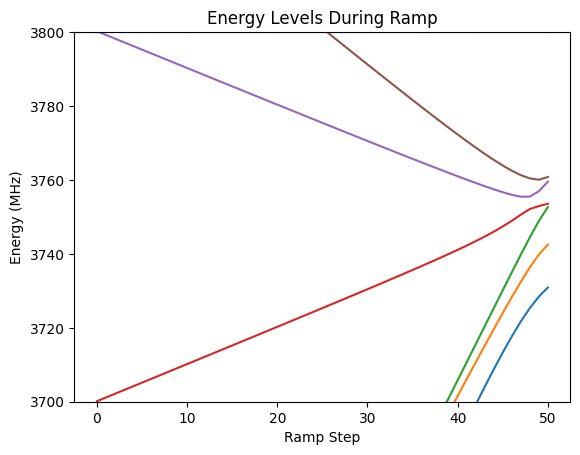

In [18]:

for state in interest_states:
    state_energy = state_to_energies[state]
    plt.axhline(y=state_energy/2/np.pi, color='k', linestyle='--', label=f'State {state} Initial')

for i in range(energy_levels.shape[1]):
    plt.plot(np.arange(len(energy_levels)), energy_levels[:, i]/2/np.pi, label=f'Level {i+1}')

plt.xlabel('Ramp Step')
plt.ylabel('Energy (MHz)')
plt.title('Energy Levels During Ramp')
# plt.legend()


# single particle band
plt.ylim(3700, 3800)
# plt.ylim(3900, 4100)

# two particle band
# plt.ylim(6000, 9000)
# plt.ylim(7450, 7650)

# three particles
# plt.ylim(11000, 13000)
# plt.ylim(11200, 11400)



# four particles
# plt.ylim(14500, 15200)
# plt.ylim(14800, 15200)



# plt.xlim(15, 40)
# plt.ylim(6004.6, 6004.9)

plt.show()

(0.0, 5.0)

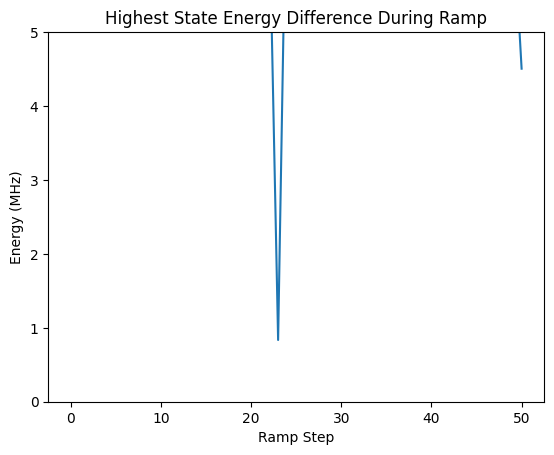

In [256]:
# check highest state difference
highest_state_difference = energy_levels[:, -1] - energy_levels[:, -2] 


plt.plot(np.arange(len(energy_levels)), highest_state_difference/2/np.pi)

plt.xlabel('Ramp Step')
plt.ylabel('Energy (MHz)')
plt.title('Highest State Energy Difference During Ramp')

plt.ylim(0, 5)

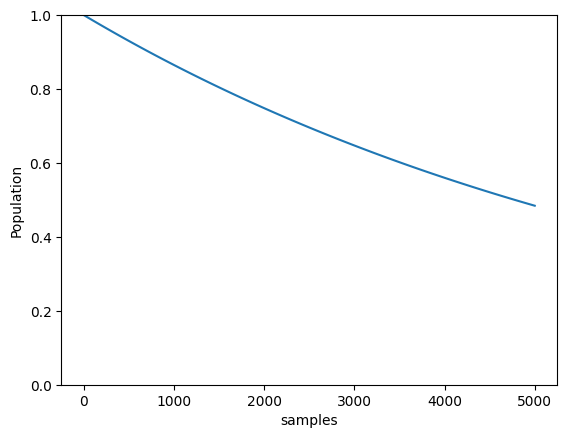

In [23]:
samples = np.linspace(0, 5000, 101)
ns_per_sample = 4.64/16

T1 = 2e3 # ns
times = samples * ns_per_sample
plt.plot(samples, np.exp(-times/T1))
plt.xlabel('samples')
plt.ylabel('Population')
plt.ylim(0,1)
plt.show()